In [13]:
import pandas as pd
%matplotlib inline

In [14]:
from pathlib import Path
csvpath = Path('../Resources/yield.csv')
data = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [15]:
data.head()

,Yield
Date,
1971-08-16,0.5632
1971-08-17,0.7108
1971-08-18,1.0657
1971-08-19,1.1335
1971-08-20,1.0313


<AxesSubplot:xlabel='Date'>

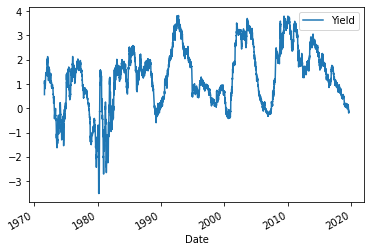

In [16]:
data.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller
adfuller(data.Yield)

(-3.393721350649343,
 0.011174781599654654,
 31,
 11943,
 {'1%': -3.430897660224935,
  '5%': -2.861782037578331,
  '10%': -2.566898831549907},
 -34557.309891380675)

<AxesSubplot:xlabel='Date'>

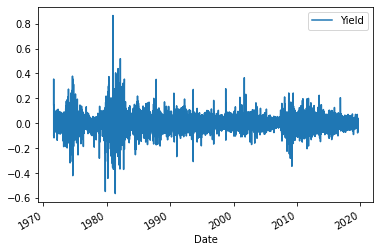

In [18]:
# Test to see if the data is stationary or non-stationary.
# Convert to stationary if needed.
data.diff().dropna().plot()
 

# Autocorrelation and Partial Autocorrelation Analysis

Use the autocorrelation and partial autocorrelation data to get a sense of how many lags to use in the ARMA model.

In [19]:
# Plot the autocorrelation of the yield data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

 

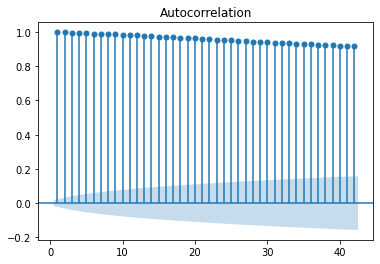

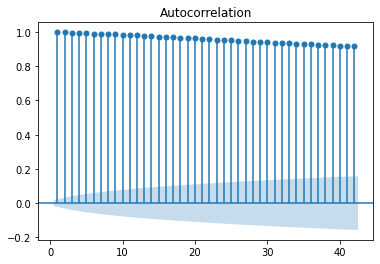

In [20]:
plot_acf(data.Yield, lags=42, zero=False)

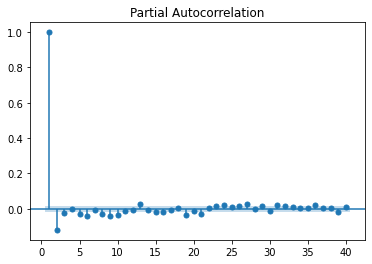

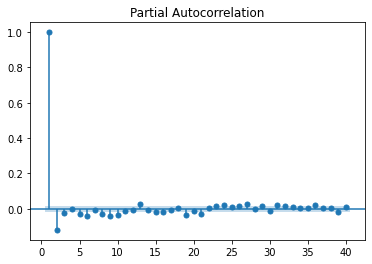

In [21]:
# Plot the partial autocorrelation of the yield data

plot_pacf(data.Yield, lags=40, zero=False)
 

How many lags should be used in the ARMA model?

The autocorrelation plot shows that all lags could potentially be useful. 

However, the partial autocorrelation plot shows most of the trend is in the first two lags.

# ARMA Model

Create an ARMA model and fit it to the data. Output the summary table and take note of the p-values of the lags.

Plot the Forecast for the next 5 days of yield changes

In [22]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data['Yield'].values, order=(2,1))
results=model.fit()
results.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                11975
Model:                     ARMA(2, 1)   Log Likelihood               17272.255
Method:                       css-mle   S.D. of innovations              0.057
Date:                Wed, 30 Sep 2020   AIC                         -34534.510
Time:                        12:29:40   BIC                         -34497.557
Sample:                             0   HQIC                        -34522.113
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1502      0.392      2.937      0.003       0.383       1.918
ar.L1.y        1.4529      0.064     22.558      0.000       1.327       1.579
ar.L2.y       -0.4537      0.064     -7.053      0.000      -0.580      -0.328
ma.L1.y       -0.3401      0.069     -4.954      0.000      -0.475      -0.206
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2            2.2005           +0.0000j            2.2005            0.0000
MA.1            2.9400           +0.0000j            2.9400            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Stock Yield Forecast'}>

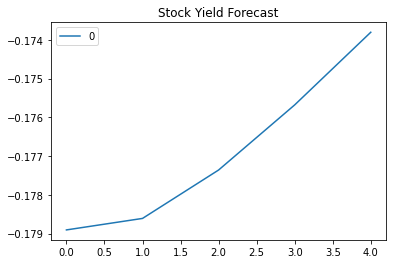

In [23]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Stock Yield Forecast")

In [24]:
# Forecasting the future
 